# Data Cleansing

Co-author: Vincent, Hayden

Last Update: 2024-04-10

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
from sklearn.preprocessing import StandardScaler, label_binarize, OneHotEncoder
from sklearn.impute import SimpleImputer

In [3]:
from scipy.stats import zscore
import warnings

In [4]:
warnings.filterwarnings('ignore')
%matplotlib inline

## Load Dataset

In [5]:
df_price = pd.read_csv('trainPrice.csv')
df_price.head()

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,0,5584,1,200601,11~20,1999,47.43,6,37.585965,127.000231,...,4.0,individual,gas,91120,65.63,46,1.0,1.0,corridor,215000000
1,1,5584,1,200601,11~20,1999,44.37,8,37.585965,127.000231,...,4.0,individual,gas,91119,61.39,10,2.0,1.0,corridor,200000000
2,2,5059,1,200601,11~20,1992,54.70,8,37.580511,127.014016,...,9.0,individual,gas,8430,72.36,201,2.0,1.0,corridor,168000000
3,3,2816,1,200601,11~20,1993,64.66,11,37.580324,127.011788,...,11.0,individual,gas,5839,87.30,284,2.0,1.0,corridor,165000000
4,4,2816,1,200601,11~20,1993,106.62,7,37.580324,127.011788,...,11.0,individual,gas,5836,127.74,112,4.0,2.0,stairway,280000000


In [6]:
df_school = pd.read_csv('Schools.csv')
df_school.head()

,school_code,latitude,longitude,school_class,operation_type,highschool_type,gender,foundation_date,address_by_law
0,S000003511,37.490880,127.015082,elementary,national,NaN,both,1953.1.31,1165010800
1,S000003563,37.577782,127.002915,elementary,national,NaN,both,1946.8.22,1111016800
2,S010000737,37.481366,127.059055,elementary,public,NaN,both,1982.9.20,1168010300
3,S010000738,37.485744,127.058002,elementary,public,NaN,both,1987.11.17,1168010300
4,S010000741,37.480805,127.051891,elementary,public,NaN,both,1983.11.30,1168010300


In [7]:
df_subway = pd.read_csv('Subways.csv')
df_subway.head()

,station_id,latitude,longitude,subway_line,address_by_law
0,1,37.555729,126.972145,"1,4,KJ,AP",1.114012e+09
1,2,37.565624,126.976936,"1,2",1.114017e+09
2,3,37.570169,126.983099,1,1.111013e+09
3,4,37.571570,126.991895,"1,3,5",1.111016e+09
4,5,37.570988,127.001921,1,1.111016e+09


## EDA

To more precisely clean / transform the dataset, we need to explore it. 

### Location

In [8]:
df_price[df_price['city']==1]

,key,apartment_id,city,transaction_year_month,transaction_date,year_of_completion,exclusive_use_area,floor,latitude,longitude,...,lowest_building_in_sites,heat_type,heat_fuel,room_id,supply_area,total_household_count_of_area_type,room_count,bathroom_count,front_door_structure,transaction_real_price
0,0,5584,1,200601,11~20,1999,47.43,6,37.585965,127.000231,...,4.0,individual,gas,91120,65.63,46,1.0,1.0,corridor,215000000
1,1,5584,1,200601,11~20,1999,44.37,8,37.585965,127.000231,...,4.0,individual,gas,91119,61.39,10,2.0,1.0,corridor,200000000
2,2,5059,1,200601,11~20,1992,54.70,8,37.580511,127.014016,...,9.0,individual,gas,8430,72.36,201,2.0,1.0,corridor,168000000
3,3,2816,1,200601,11~20,1993,64.66,11,37.580324,127.011788,...,11.0,individual,gas,5839,87.30,284,2.0,1.0,corridor,165000000
4,4,2816,1,200601,11~20,1993,106.62,7,37.580324,127.011788,...,11.0,individual,gas,5836,127.74,112,4.0,2.0,stairway,280000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601433,1605268,12439,1,201810,1~10,2008,59.99,8,37.459037,126.919682,...,13.0,individual,gas,13062,81.59,316,3.0,1.0,stairway,450000000
1601444,1605311,6492,1,201810,21~31,2004,59.34,12,37.448271,126.918772,...,15.0,individual,gas,10538,76.73,770,3.0,1.0,corridor,305000000
1601454,1605346,16686,1,201810,21~31,2007,59.99,4,37.502392,126.942033,...,8.0,individual,gas,13884,79.98,254,3.0,2.0,stairway,771000000
1601456,1605366,3686,1,201810,21~31,1996,59.34,4,37.555215,127.131294,...,11.0,individual,gas,165820,88.37,4,3.0,1.0,corridor,485000000


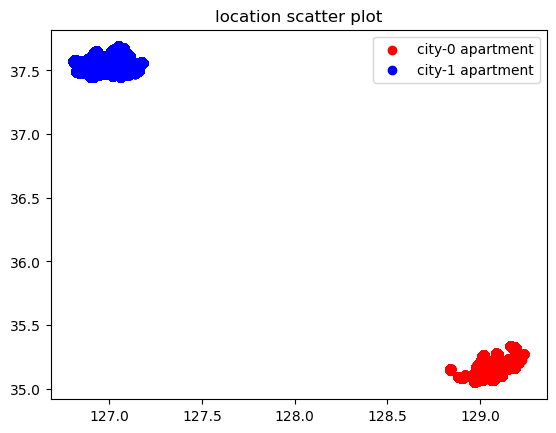

In [9]:
plt.scatter(df_price[df_price['city']==0]['longitude'], df_price[df_price['city']==0]['latitude'], color='red', label='city-0 apartment')
plt.scatter(df_price[df_price['city']==1]['longitude'], df_price[df_price['city']==1]['latitude'], color='blue', label='city-1 apartment')
plt.title('location scatter plot')
plt.legend()
plt.show()

It is obvious that the location in this dataset can be divided into two clusters, which belongs to City 0 is Busan and City 1 (Seoul) .

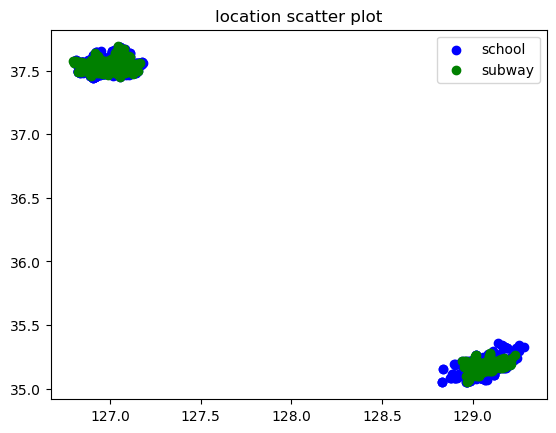

In [10]:
plt.scatter(df_school['longitude'], df_school['latitude'], color='blue', label='school')
plt.scatter(df_subway['longitude'], df_subway['latitude'], color='green', label='subway')
plt.title('location scatter plot')
plt.legend()
plt.show()

However, there is no separate for subway and school.  

### Transaction Price

In [1]:
plt.hist(df_price['transaction_real_price'], bins=200)
plt.title('Histogram target counts')
plt.xlabel('Count')
plt.ylabel('Transaction Price')
plt.show()

NameError: name 'plt' is not defined

## Data Cleansing

## Imputation

### Inspect Missing Value

In [12]:
def print_feature_missing_values(df):
    _ = df.isna().sum()
    _ = _[_ > 0]
    return pd.DataFrame(_)

**Check `df_price`**

In [13]:
print_feature_missing_values(df_price)

,0
total_parking_capacity_in_site,91813
tallest_building_in_sites,9
lowest_building_in_sites,9
heat_type,2017
heat_fuel,9667
room_count,691
bathroom_count,691
front_door_structure,13892


For the below columns, we need to analyse the reason and the possible imputation to handle them.  

In [14]:
# missing in pair
df_price[df_price['lowest_building_in_sites'].isna()][[
    'lowest_building_in_sites', 
    'tallest_building_in_sites'
]]

,lowest_building_in_sites,tallest_building_in_sites
1364011,NaN,NaN
1364012,NaN,NaN
1376623,NaN,NaN
1384989,NaN,NaN
1410300,NaN,NaN
1448208,NaN,NaN
1448209,NaN,NaN
1555578,NaN,NaN
1560091,NaN,NaN


In [15]:
# missing in pair
df_price[df_price['room_count'].isna()][[
    'room_count', 
    'bathroom_count',
    'longitude',
    'latitude',
    'address_by_law'
]].sort_values('address_by_law')

,room_count,bathroom_count,longitude,latitude,address_by_law
1593873,NaN,NaN,126.913448,37.595686,1138010900
245976,NaN,NaN,126.913448,37.595686,1138010900
1144928,NaN,NaN,126.913448,37.595686,1138010900
251684,NaN,NaN,126.913448,37.595686,1138010900
1141000,NaN,NaN,126.913448,37.595686,1138010900
...,...,...,...,...,...
1541644,NaN,NaN,129.092850,35.189564,2647010200
1538704,NaN,NaN,129.092850,35.189564,2647010200
1525463,NaN,NaN,129.092850,35.189564,2647010200
1558294,NaN,NaN,129.092850,35.189564,2647010200


In [16]:
no_room_address = set(df_price[df_price['room_count'].isna()][
    'address_by_law'
])
no_room_address

{1138010900,
 1144010800,
 1168010500,
 1171010200,
 1174010900,
 2629010600,
 2647010200}

In [17]:
df_price[df_price['address_by_law'].isin(no_room_address)][['address_by_law', 'room_count']]

,address_by_law,room_count
325,1138010900,3.0
326,1138010900,3.0
327,1138010900,3.0
328,1138010900,3.0
329,1138010900,3.0
...,...,...
1601330,2647010200,3.0
1601331,2647010200,3.0
1601332,2647010200,3.0
1601341,2647010200,3.0


It proves that although only a handful of address has no room / bathroom count, not all the apartments in those addresses have no room.  

In [18]:
# missing in pair
df_price[df_price['heat_type'].isna()][[
    'heat_type', 
    'heat_fuel'
]]

,heat_type,heat_fuel
1012904,NaN,NaN
1012911,NaN,NaN
1018506,NaN,NaN
1018512,NaN,NaN
1022869,NaN,NaN
...,...,...
1599865,NaN,NaN
1599877,NaN,NaN
1600077,NaN,NaN
1600078,NaN,NaN


In [19]:
# remaining missing count matches total missing count
df_price[df_price['heat_fuel'].isna() & df_price['heat_type'].notna()][[
    'heat_type', 
    'heat_fuel'
]]

,heat_type,heat_fuel
150,individual,NaN
153,individual,NaN
154,individual,NaN
156,individual,NaN
157,individual,NaN
...,...,...
1600122,individual,NaN
1600399,individual,NaN
1600547,individual,NaN
1600548,individual,NaN


In [20]:
# no correlation between heat_fuel and missing heat_type
df_price[df_price['heat_fuel'].isna() & df_price['heat_type'].notna()][
    'heat_type'
].unique()

array(['individual', 'central', 'district'], dtype=object)

In [21]:
df_price['front_door_structure'].unique().tolist()

['corridor', 'stairway', 'mixed', nan, '-']

For the above findings, we can conclude that: 

- `tallest_building_in_sites` and `lowest_building_in_sites`: Missing data in pair.  Assign 0 for both features.
- `room_count` and `bathroom_count`: Missing data in pair.  Those small number of apartments does not have room count - they got the whole apartment, and the bothroom could be shared.  Assign 0 for both features.
- `heat_fuel` and `heat_type` Missing in Pair: It is possible that the apartment does not have heating.  use '-' to denote both missing features.  
- only `heat_fuel` missing: missig data, use '-' to replace NaN. 
- `total_parking_capacity_in_site`: some apartments might not have parking capacity, as the estate does not provide a carpark.  Assign 0 for this feature.  
- `front_door_structure`: missing data, use '-' to replace NaN.  

**Check `df_subway`**

In [22]:
print_feature_missing_values(df_subway)

,0
address_by_law,9


As the subway does nto have `address_by_law`, we simply ignore them.  

**Check `df_school`**

In [23]:
print_feature_missing_values(df_school)

,0
highschool_type,1459


In [24]:
df_school[df_school['highschool_type'].isna() & df_school['school_class'] == 'high'][[
    'highschool_type',
    'school_class'
]].values.any()

False

The result is logical, as not all school are highschool.  Simply leave the missing value there. 

### Handling Missing Value

In [25]:
df_price[[
    'tallest_building_in_sites', 
    'lowest_building_in_sites',
    'room_count',
    'bathroom_count',
    'total_parking_capacity_in_site'
]] = df_price[[
    'tallest_building_in_sites', 
    'lowest_building_in_sites',
    'room_count',
    'bathroom_count',
    'total_parking_capacity_in_site'
]].fillna(0)

In [26]:
df_price[[
    'heat_type',
    'heat_fuel',
    'front_door_structure'
]] = df_price[[
    'heat_type',
    'heat_fuel',
    'front_door_structure'
]].fillna('-')

In [27]:
print_feature_missing_values(df_price)

,0


## Replace Column

### Calculated Features

From the nature of the features, we noticed that some calculation / derive could be useful in prediction.  

- transaction month, transaction year: break transaction_month_year into two columns
- diff_hight_in_site: tallest_building_in_sites - lowest_building_in_site
- building_age: transaction_year - year_of_completion
- city for subway and school: adding new feature `city` which align to `df_price`

In [28]:
df_price['transaction_year'] = df_price['transaction_year_month'].astype(str).str[:4].astype(int)
df_price['transaction_month'] = df_price['transaction_year_month'].astype(str).str[4:].astype(int)

In [29]:
df_price['diff_height_in_site'] = df_price['tallest_building_in_sites'] - df_price['lowest_building_in_sites']

In [30]:
df_price['building_age'] = df_price['transaction_year'] - df_price['year_of_completion']

In [31]:
df_price[['transaction_year', 'transaction_month', 'diff_height_in_site', 'building_age']].head()

,transaction_year,transaction_month,diff_height_in_site,building_age
0,2006,1,4.0,7
1,2006,1,4.0,7
2,2006,1,5.0,14
3,2006,1,4.0,13
4,2006,1,4.0,13


In [32]:
df_school['city'] = df_school['longitude'].apply(lambda x: 1 if x < 128 else 0)

In [33]:
df_school[['longitude', 'latitude', 'city']].head()

,longitude,latitude,city
0,127.015082,37.490880,1
1,127.002915,37.577782,1
2,127.059055,37.481366,1
3,127.058002,37.485744,1
4,127.051891,37.480805,1


In [34]:
df_subway['city'] = df_subway['longitude'].apply(lambda x: 1 if x < 128 else 0)

In [35]:
df_subway[['longitude', 'latitude', 'city']].head()

,longitude,latitude,city
0,126.972145,37.555729,1
1,126.976936,37.565624,1
2,126.983099,37.570169,1
3,126.991895,37.571570,1
4,127.001921,37.570988,1


### Drop Columns

We can replace some old features with new features.  

In [36]:
df_price = df_price.drop(['transaction_year_month', 'year_of_completion'], axis=1)

In [37]:
['transaction_year_month', 'year_of_completion'] in list(df_price.columns)

False

## Transformation

### Normalization

Some numeric feature requires normalization.  

In [38]:
# z-score standardize age variable
numeric_features = [
    'exclusive_use_area',
    'floor',
    'total_parking_capacity_in_site',
    'total_household_count_in_sites',
    'apartment_building_count_in_sites',
    'supply_area',
    'total_household_count_of_area_type',
    'room_count',
    'bathroom_count',
    # calculated features
    'building_age',
    'diff_height_in_site'
]

for _ in numeric_features:
    df_price[_] = zscore(df_price[_], axis=0)

In [39]:
df_price[numeric_features].head()

,exclusive_use_area,floor,total_parking_capacity_in_site,total_household_count_in_sites,apartment_building_count_in_sites,supply_area,total_household_count_of_area_type,room_count,bathroom_count,building_age,diff_height_in_site
0,-1.144215,-0.574123,-0.747549,-0.926899,-0.839598,-1.100212,-0.763389,-2.919069,-1.154196,-0.773545,-0.464369
1,-1.253499,-0.296118,-0.747549,-0.926899,-0.839598,-1.228462,-0.874574,-1.422105,-1.154196,-0.773545,-0.464369
2,-0.884577,-0.296118,-0.249759,-0.528882,-0.553712,-0.896645,-0.284680,-1.422105,-1.154196,0.033850,-0.300707
3,-0.528870,0.120889,-0.249759,-0.232807,-0.410769,-0.444746,-0.028338,-1.422105,-1.154196,-0.081492,-0.464369
4,0.969673,-0.435120,-0.249759,-0.232807,-0.410769,0.778466,-0.559552,1.571822,0.813783,-0.081492,-0.464369


For location, we need to normalize with the subway and school, otherwise the mean and variance is inconsistent. 

In [40]:
# location normalization
location_features = ['latitude', 'longitude']

df_loc = pd.concat([
    df_price[location_features], 
    df_school[location_features], 
    df_subway[location_features]
])
for _ in location_features:
    loc_mean = df_loc[_].mean()
    loc_var = df_loc[_].var()
    df_price[_] = (df_price[_] - loc_mean) / loc_var
    df_school[_] = (df_school[_] - loc_mean) / loc_var
    df_subway[_] = (df_subway[_] - loc_mean) / loc_var

In [41]:
df_price[location_features].head()

,latitude,longitude
0,0.689431,-0.765620
1,0.689431,-0.765620
2,0.685361,-0.751986
3,0.685221,-0.754190
4,0.685221,-0.754190


### Encoding

**Encode `df_price`**

In [42]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601458 entries, 0 to 1601457
Data columns (total 27 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   key                                 1601458 non-null  int64  
 1   apartment_id                        1601458 non-null  int64  
 2   city                                1601458 non-null  int64  
 3   transaction_date                    1601458 non-null  object 
 4   exclusive_use_area                  1601458 non-null  float64
 5   floor                               1601458 non-null  float64
 6   latitude                            1601458 non-null  float64
 7   longitude                           1601458 non-null  float64
 8   address_by_law                      1601458 non-null  int64  
 9   total_parking_capacity_in_site      1601458 non-null  float64
 10  total_household_count_in_sites      1601458 non-null  float64
 11  apartment_b

only 4 features are categorical data.  

In [43]:
set(df_price['transaction_date'])

{'11~20', '1~10', '21~28', '21~29', '21~30', '21~31'}

In [44]:
set(df_price['heat_type'])

{'-', 'central', 'district', 'individual'}

In [45]:
set(df_price['heat_fuel'])

{'-', 'cogeneration', 'gas'}

In [46]:
set(df_price['front_door_structure'])

{'-', 'corridor', 'mixed', 'stairway'}

One-hot encode it in format "column_name-column_value"

In [47]:
def one_hot_encoding(df, column:str):
    distinct_values = set(df[column])
    for distinct_value in distinct_values:
        column_name = "%s_%s" % (column, distinct_value)
        df[column_name] = df[column].apply(lambda x: 1 if x == distinct_value else 0)
    df = df.drop(column, axis=1)
    return df

In [48]:
df_price = one_hot_encoding(df_price, 'transaction_date')
df_price = one_hot_encoding(df_price, 'front_door_structure')
df_price = one_hot_encoding(df_price, 'heat_type')
df_price = one_hot_encoding(df_price, 'heat_fuel')

In [49]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1601458 entries, 0 to 1601457
Data columns (total 40 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   key                                 1601458 non-null  int64  
 1   apartment_id                        1601458 non-null  int64  
 2   city                                1601458 non-null  int64  
 3   exclusive_use_area                  1601458 non-null  float64
 4   floor                               1601458 non-null  float64
 5   latitude                            1601458 non-null  float64
 6   longitude                           1601458 non-null  float64
 7   address_by_law                      1601458 non-null  int64  
 8   total_parking_capacity_in_site      1601458 non-null  float64
 9   total_household_count_in_sites      1601458 non-null  float64
 10  apartment_building_count_in_sites   1601458 non-null  float64
 11  tallest_bui

**Encode `df_subway`**

In [50]:
distinct_lines = set(df_subway['subway_line'].str.split(',', expand=True).values.ravel())

In [51]:
for distinct_line in distinct_lines:
    if distinct_line is not None:
        column_name = "%s_%s" % ("line_", distinct_line)
        df_subway[column_name] = df_subway['subway_line'].apply(lambda x: 1 if distinct_line in list(x.split(','))  else 0)
df_subway = df_subway.drop('subway_line', axis=1)

In [52]:
df_subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405 entries, 0 to 404
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   station_id      405 non-null    int64  
 1   latitude        405 non-null    float64
 2   longitude       405 non-null    float64
 3   address_by_law  396 non-null    float64
 4   city            405 non-null    int64  
 5   line__B1        405 non-null    int64  
 6   line__B3        405 non-null    int64  
 7   line__BK        405 non-null    int64  
 8   line__B2        405 non-null    int64  
 9   line__DL        405 non-null    int64  
 10  line__ND        405 non-null    int64  
 11  line__5         405 non-null    int64  
 12  line__B4        405 non-null    int64  
 13  line__6         405 non-null    int64  
 14  line__AP        405 non-null    int64  
 15  line__3         405 non-null    int64  
 16  line__8         405 non-null    int64  
 17  line__7         405 non-null    int

**Cleanse `df_school`**

In [53]:
df_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school_code      1921 non-null   object 
 1   latitude         1921 non-null   float64
 2   longitude        1921 non-null   float64
 3   school_class     1921 non-null   object 
 4   operation_type   1921 non-null   object 
 5   highschool_type  462 non-null    object 
 6   gender           1921 non-null   object 
 7   foundation_date  1921 non-null   object 
 8   address_by_law   1921 non-null   int64  
 9   city             1921 non-null   int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 150.2+ KB


In [54]:
df_school.head()

,school_code,latitude,longitude,school_class,operation_type,highschool_type,gender,foundation_date,address_by_law,city
0,S000003511,0.618471,-0.750931,elementary,national,NaN,both,1953.1.31,1165010800,1
1,S000003563,0.683324,-0.762966,elementary,national,NaN,both,1946.8.22,1111016800,1
2,S010000737,0.611371,-0.707439,elementary,public,NaN,both,1982.9.20,1168010300,1
3,S010000738,0.614638,-0.708481,elementary,public,NaN,both,1987.11.17,1168010300,1
4,S010000741,0.610953,-0.714525,elementary,public,NaN,both,1983.11.30,1168010300,1


In [55]:
#transform 'school_code' into int

codes, uniques = pd.factorize(df_school['school_code'])
df_school['school_code'] = codes

In [59]:
#one hot encode 'school_class', 'operation_type', 'highschool_type', 'gender'
df_school = one_hot_encoding(df_school, 'school_class')
df_school = one_hot_encoding(df_school, 'operation_type')
df_school = one_hot_encoding(df_school, 'highschool_type')
df_school = one_hot_encoding(df_school, 'gender')

In [63]:
#handle foundation year
df_school['foundation_year'] = df_school['foundation_date'].str[:4].astype(int)
df_school = df_school.drop(['foundation_date'], axis=1)
df_school.head()

,school_code,latitude,longitude,address_by_law,city,school_class_high,school_class_middle,school_class_elementary,operation_type_national,operation_type_private,operation_type_public,highschool_type_nan,highschool_type_general,highschool_type_specialized,highschool_type_autonomous,highschool_type_objective,gender_male,gender_both,gender_female,foundation_year
0,0,0.618471,-0.750931,1165010800,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1953
1,1,0.683324,-0.762966,1111016800,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1946
2,2,0.611371,-0.707439,1168010300,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1982
3,3,0.614638,-0.708481,1168010300,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1987
4,4,0.610953,-0.714525,1168010300,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1983


In [64]:
df_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1921 entries, 0 to 1920
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   school_code                  1921 non-null   int64  
 1   latitude                     1921 non-null   float64
 2   longitude                    1921 non-null   float64
 3   address_by_law               1921 non-null   int64  
 4   city                         1921 non-null   int64  
 5   school_class_high            1921 non-null   int64  
 6   school_class_middle          1921 non-null   int64  
 7   school_class_elementary      1921 non-null   int64  
 8   operation_type_national      1921 non-null   int64  
 9   operation_type_private       1921 non-null   int64  
 10  operation_type_public        1921 non-null   int64  
 11  highschool_type_nan          1921 non-null   int64  
 12  highschool_type_general      1921 non-null   int64  
 13  highschool_type_sp

## Export

In [65]:
df_price.to_csv('price_transform.csv', index=False)

In [66]:
df_school.to_csv('school_transform.csv', index=False)

In [67]:
df_subway.to_csv('subway_transform.csv', index=False)